In [1]:
import cv2
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import Model

## CONVOLUTIONAL LAYERS VISUALIZER
#### Must have ready:
- trained model
- test image
------------------------------
#### How it works
The visualizer takes CNN model ( for example model.h5 ) and pictures of dog and cat ( for example dog.jpg, cat.jpg). It creates alternate model with the layers of the trained model. So we can display and read the outputs of each of the layers.
It extracts the image and feeds it into the model inputs.
It then runs a simple prediction task with the new picture meanwhile analysing the networks layers features. These features are converted into 2D images which are shown as outputs.

In [2]:
import keras
print(keras.__version__)
import tensorflow as tf
print(tf.keras.__version__)


3.5.0
3.5.0


In [3]:
# MODEL PATH, DOG PATH, CAT PATH
model_path = "model.h5"
image_dog_path = "dog.jpg"
image_cat_path = "cat.jpg"

In [4]:
# LOADING INPUTS HERE
model = load_model(model_path)
model.summary()
print(model.layers)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,112,516 (19.50 MB)

 Trainable params: 5,110,530 (19.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

 Optimizer params: 2 (12.00 B)

[<Conv2D name=conv2d_8, built=True>, <BatchNormalization name=batch_normalization_10, built=True>, <MaxPooling2D name=max_pooling2d_8, built=True>, <Dropout name=dropout_10, built=True>, <Conv2D name=conv2d_9, built=True>, <BatchNormalization name=batch_normalization_11, built=True>, <MaxPooling2D name=max_pooling2d_9, built=True>, <Dropout name=dropout_11, built=True>, <Conv2D name=conv2d_10, built=True>, <BatchNormalization name=batch_normalization_12, built=True>, <MaxPooling2D name=max_pooling2d_10, built=True>, <Dropout name=dropout_12, built=True>, <Conv2D name=conv2d_11, built=True>, <BatchNormalization name=batch_normalization_13, built=True>, <MaxPooling2D name=max_pooling2d_11, built=True>, <Dropout name=dropout_13, built=True>, <Flatten name=flatten_2, built=True>, <Dense name=dense_4, built=True>, <BatchNormalization name=batch_normalization_14, built=True>, <Dropout name=dropout_14, built=True>, <Dense name=dense_5, built=True>]


In [5]:
# EXTRACTING CONVOLUTIONAL LAYERS AND MAKING NEW MODEL
def get_conv_layers(model):
    conv_layers = {}
    index = 0
    for layer in model.layers:
        if 'conv' in layer.name:
            conv_layers[index] = layer
        index += 1
    return conv_layers


layers = model.layers
conv_layers = get_conv_layers(model)
print(conv_layers)
outputs = [model.layers[i].output for i in conv_layers]
model_short = Model(inputs=model.inputs, outputs=outputs)
model_short.summary()


{0: <Conv2D name=conv2d_8, built=True>, 4: <Conv2D name=conv2d_9, built=True>, 8: <Conv2D name=conv2d_10, built=True>, 12: <Conv2D name=conv2d_11, built=True>}


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 126, 126, 32)   │            896 │ input_layer_2[0][0],   │
│                           │                        │                │ input_layer_2[0][0],   │
│                           │                        │                │ input_layer_2[0][0],   │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 126, 126, 32)   │            128 │ conv2d_8[4][0],        │
│ (BatchNormalization)      │                        │                │ conv2d_8[8][0],        │
│                           │                        │                │ conv2d_8[12][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 63, 63, 32)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │ batch_normalization_1… │
│                           │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 63, 63, 32)     │              0 │ max_pooling2d_8[2][0], │
│                           │                        │                │ max_pooling2d_8[6][0], │
│                           │                        │                │ max_pooling2d_8[10][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 61, 61, 64)     │         18,496 │ dropout_10[1][0],      │
│                           │                        │                │ dropout_10[5][0],      │
│                           │                        │                │ dropout_10[9][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 61, 61, 64)     │            256 │ conv2d_9[4][0],        │
│ (BatchNormalization)      │                        │                │ conv2d_9[8][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_9           │ (None, 30, 30, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 30, 30, 64)     │              0 │ max_pooling2d_9[2][0], │
│                           │                        │                │ max_pooling2d_9[6][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 28, 28, 128)    │         73,856 │ dropout_11[1][0],      │
│                           │                        │                │ dropout_11[5][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 28, 28, 128)    │            512 │ conv2d_10[4][0]        │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 389,312 (1.49 MB)

 Trainable params: 388,864 (1.48 MB)

 Non-trainable params: 448 (1.75 KB)

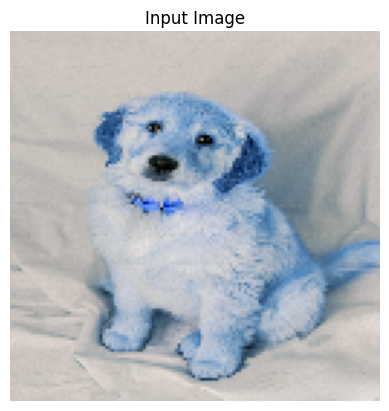

In [6]:
# CREATING TEST IMAGE TEMPLATE / IMPORT TEST IMAGE
image_size = 128
image_channel = 3

# Load and preprocess the input image
image_path = image_dog_path  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.resize(image, (image_size, image_size))  # Resize to input shape
image = image / 255.0  # Normalize if needed
image = np.expand_dims(image, axis=0)  # Add batch dimension

plt.imshow(image[0])  # Show the image
plt.axis('off')
plt.title("Input Image")
plt.show()


In [7]:
# VISUALIZING AND SAVING IMAGE IN CONVOLUTIONAL LAYERS
feature_output = model_short.predict(image)

# columns and rows depends on the number of feature you want to display
# you should also alternate the figsize
columns = 8
rows = 8

# Directory to save the feature map images
save_dir = "images"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Loop through the feature maps for each layer
for layer_idx, ftr in enumerate(feature_output):
    fig = plt.figure(figsize=(12, 12))  # Create a figure for each layer's feature maps
    for i in range(1, columns * rows + 1):
        ax = plt.subplot(rows, columns, i)  # Create subplots in a grid
        ax.set_xticks([])
        ax.set_yticks([])
        if i <= ftr.shape[-1]:  # Ensure there are enough feature maps to plot
            plt.imshow(ftr[0, :, :, i - 1])
    plt.tight_layout()
# plt.show()

    # Save the plot as an image
    print(layer_idx)
    print(conv_layers)
    save_path = os.path.join(save_dir, f"convlayer_{layer_idx + 1}.png")
    plt.savefig(save_path, dpi=300)  # Save with high resolution
    plt.close(fig)  # Close the figure to save memory

    print(f"Saved feature map for Layer {layer_idx + 1} to {save_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
0
{0: <Conv2D name=conv2d_8, built=True>, 4: <Conv2D name=conv2d_9, built=True>, 8: <Conv2D name=conv2d_10, built=True>, 12: <Conv2D name=conv2d_11, built=True>}
Saved feature map for Layer 1 to images/convlayer_1.png
1
{0: <Conv2D name=conv2d_8, built=True>, 4: <Conv2D name=conv2d_9, built=True>, 8: <Conv2D name=conv2d_10, built=True>, 12: <Conv2D name=conv2d_11, built=True>}
Saved feature map for Layer 2 to images/convlayer_2.png
2
{0: <Conv2D name=conv2d_8, built=True>, 4: <Conv2D name=conv2d_9, built=True>, 8: <Conv2D name=conv2d_10, built=True>, 12: <Conv2D name=conv2d_11, built=True>}
Saved feature map for Layer 3 to images/convlayer_3.png
3
{0: <Conv2D name=conv2d_8, built=True>, 4: <Conv2D name=conv2d_9, built=True>, 8: <Conv2D name=conv2d_10, built=True>, 12: <Conv2D name=conv2d_11, built=True>}
Saved feature map for Layer 4 to images/convlayer_4.png


In [8]:
def overlay_heatmap(original_image, activation_map):
    """
    Overlay a heatmap on the original image using activations from a convolutional layer.
    """
    heatmap = np.mean(activation_map, axis=-1)  # Average across filters
    heatmap = np.maximum(heatmap, 0)  # ReLU-like
    heatmap /= heatmap.max()  # Normalize

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Combine heatmap with original image
    superimposed = heatmap * 0.4 + original_image
    return np.uint8(superimposed)

# Example function to save heatmap overlaid images
def save_overlay_heatmap(model, image, filter="",save_dir="heatmaps", columns=4, rows=6):
    # extract the name of the image
    image_name = os.path.basename(image_path)
    if "." in image_name:
        image_name = os.path.splitext(image_name)[0]

    # extract and fix the name of the filter
    filter_name = ""
    if filter != "":
        filter_name = filter + "_"

    # check if save directory exists and is created
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Get feature maps from the model
    feature_output = model.predict(image)

    for layer_idx, ftr in enumerate(feature_output):
        # Create overlayed heatmap for each feature map
        overlayed_image = overlay_heatmap(image[0], ftr[0])  # Taking the first image in the batch

        # Plot the overlayed image
        fig = plt.figure(figsize=(12, 12))
        plt.imshow(overlayed_image)
        plt.axis('off')  # Hide axes

        # Save the overlayed heatmap
        save_path = os.path.join(save_dir, f"{image_name}_{filter_name}overlayed_layer_{layer_idx + 1}.png")
        plt.savefig(save_path, dpi=300)  # Save with high resolution
        plt.close(fig)  # Close the figure to free memory

        print(f"Saved overlayed heatmap for Layer {layer_idx + 1} to {save_path}")

# Example usage
save_overlay_heatmap(model=model_short, image=image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Saved overlayed heatmap for Layer 1 to heatmaps/dog_overlayed_layer_1.png
Saved overlayed heatmap for Layer 2 to heatmaps/dog_overlayed_layer_2.png
Saved overlayed heatmap for Layer 3 to heatmaps/dog_overlayed_layer_3.png
Saved overlayed heatmap for Layer 4 to heatmaps/dog_overlayed_layer_4.png


In [9]:
########################## PROCESSING OF THE REST ##########################################

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Saved feature map for Layer 1 to images/dog_conv_layer_1.png
Saved feature map for Layer 2 to images/dog_conv_layer_2.png
Saved feature map for Layer 3 to images/dog_conv_layer_3.png
Saved feature map for Layer 4 to images/dog_conv_layer_4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Saved overlayed heatmap for Layer 1 to heatmaps/dog_conv_overlayed_layer_1.png
Saved overlayed heatmap for Layer 2 to heatmaps/dog_conv_overlayed_layer_2.png
Saved overlayed heatmap for Layer 3 to heatmaps/dog_conv_overlayed_layer_3.png
Saved overlayed heatmap for Layer 4 to heatmaps/dog_conv_overlayed_layer_4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
Saved feature map for Layer 1 to images/dog_pooling_layer_1.png
Saved feature map for Layer 2 to images/dog_pooling_layer_2.png
Saved feature map for Layer 3 to images/dog_pooling_layer_3.png
Saved feature map for Layer 4 to images/dog_pooling_layer_4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Saved overlayed heatmap for La

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Saved feature map for Layer 1 to images/dog_dropout_layer_1.png
Saved feature map for Layer 2 to images/dog_dropout_layer_2.png
Saved feature map for Layer 3 to images/dog_dropout_layer_3.png
Saved feature map for Layer 4 to images/dog_dropout_layer_4.png
Error was at image= dog.jpg filter= dropout


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
Error was at image= dog.jpg filter= dense
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
Saved feature map for Layer 1 to images/cat_conv_layer_1.png
Saved feature map for Layer 2 to images/cat_conv_layer_2.png
Saved feature map for Layer 3 to images/cat_conv_layer_3.png
Saved feature map for Layer 4 to images/cat_conv_layer_4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Saved overlayed heatmap for Layer 1 to heatmaps/cat_conv_overlayed_layer_1.png
Saved overlayed heatmap for Layer 2 to heatmaps/cat_conv_overlayed_layer_2.png
Saved overlayed heatmap for Layer 3 to heatmaps/cat_conv_overlayed_layer_3.png
Saved overlayed heatmap for Layer 4 to heatmaps/cat_conv_overlayed_layer_4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
Saved feature map for Layer 1 to images/cat_pooling_layer_1.png
Saved feature map for Layer 2 to images/cat_pooling_layer_2.png
Saved feature map for Layer 3 to images/cat_pooling_layer_3.png
Saved feature map for Layer 4 to images/cat_pooling

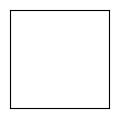

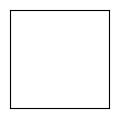

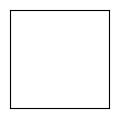

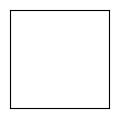

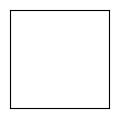

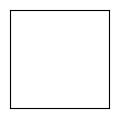

In [10]:
def get_layers(model, filter):
    conv_layers = {}
    index = 0
    for layer in model.layers:
        if filter in layer.name:
            conv_layers[index] = layer
        index += 1
    return conv_layers


def get_image(image_path, image_size=128, image_channed=3):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (image_size, image_size))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

def save_image_layer(model, image, filter, save_dir="images", columns=8, rows=8):
    feature_output = model_short.predict(image)

    image_name = os.path.basename(image_path)
    if "." in image_name:
        image_name = os.path.splitext(image_name)[0]

    save_dir = "images"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for layer_idx, ftr in enumerate(feature_output):
        fig = plt.figure(figsize=(12, 12))
        for i in range(1, columns * rows + 1):
            ax = plt.subplot(rows, columns, i)
            ax.set_xticks([])
            ax.set_yticks([])
            if i <= ftr.shape[-1]:
                plt.imshow(ftr[0, :, :, i - 1])
        plt.tight_layout()
    #plt.plot()

        save_path = os.path.join(save_dir, f"{image_name}_{filter}_layer_{layer_idx + 1}.png")
        plt.savefig(save_path, dpi=300)
        plt.close(fig)
        print(f"Saved feature map for Layer {layer_idx + 1} to {save_path}")


"""
HERE YOU CAN ADD FILTERS TO EXTRACT NETWORK LAYERS
"""

filters = ["conv", "pooling", "normalization","dropout", "dense"]
layers = model.layers
image_dog_path = "dog.jpg"
image_cat_path = "cat.jpg"
images = [image_dog_path, image_cat_path]

for image_path in images:
    for filter in filters:
        try:
          filter_layers = get_layers(model, filter)
          outputs = [model.layers[i].output for i in filter_layers]
          model_short = Model(inputs=model.inputs, outputs=outputs)
          image = get_image(image_path)
          save_image_layer(model=model_short, image=image, filter=filter)
          save_overlay_heatmap(model=model_short, image=image,filter=filter)
        except:
          print("Error was at", "image=",image_path,"filter=",filter)